In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

design=designs.DesignPlanar()
design.overwrite_enabled=True
gui=MetalGUI(design)

In [2]:
options_pocket=dict(padwidth='425 um',
                    pocket_height='650 um',
                    connection_pads=dict(a=dict(loc_W=+1, loc_H=+1),
                                        b=dict(loc_W=-1, loc_H=+1, pad_height='30 um'),
                                        c=dict(loc_W=+1, loc_H=-1, pad_width='200 um'),
                                        d=dict(loc_W=-1, loc_H=-1, pad_width='50 um')))


In [3]:
q1=TransmonPocket(design, 'Q1', options=dict(pos_x='+2.55 mm', pos_y='+0.0 mm', **options_pocket))
q2=TransmonPocket(design, 'Q2', options=dict(pos_x='+0.0 mm', pos_y='-0.9 mm', orientation='90', **options_pocket))
q3=TransmonPocket(design, 'Q3', options=dict(pos_x='-2.55 mm', pos_y='+0.0 mm', **options_pocket))
q4=TransmonPocket(design, 'Q4', options=dict(pos_x='+0.0 mm', pos_y='+0.9 mm', orientation='90', **options_pocket))

gui.rebuild()
gui.autoscale()
gui.toggle_docks(do_hide=None)
'''
toggle1_docks(do_hide=Boolean: True or None(False))
True: the gui shows nothing but the qubit chip.
None: the gui shows the qubit chip as well as other categories(library, edit component, etc).
'''

'\ntoggle1_docks(do_hide=Boolean: True or None(False))\nTrue: the gui shows nothing but the qubit chip.\nNone: the gui shows the qubit chip as well as other categories(library, edit component, etc).\n'

In [4]:
RouteMeander.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False}

In [5]:
options_meander=Dict(meander=Dict(lead_start='0.1 mm',
                                  lead_end='0.1 mm',
                                  asymmetry='0 um'))
def connect(component_name:str, component1:str, pin1:str, component2:str, pin2: str, 
            length: str, asymmetry='0 um', flip=False):
    myoptions=Dict(pin_inputs=Dict(start_pin=Dict(component=component1, pin=pin1),
                                   end_pin=Dict(component=component2, pin=pin2)),
                   lead=Dict(start_straight='0.13 mm'),
                   total_length=length,
                   fillet='90 um')
    myoptions.update(options_meander)
    myoptions.meander.asymmetry=asymmetry
    myoptions.meander.lead_direction_inverted='true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

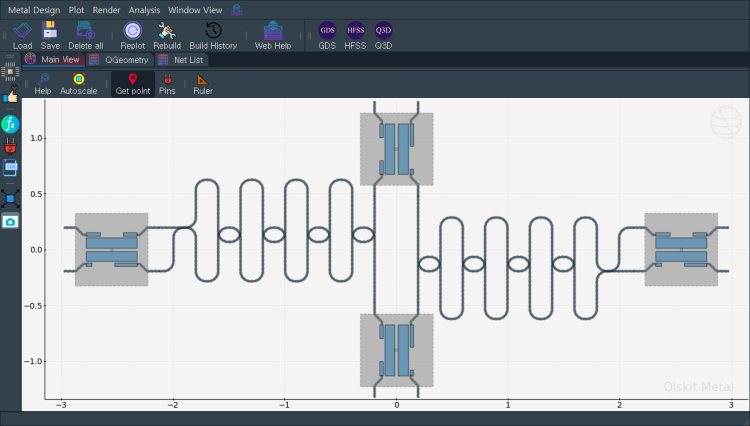

In [6]:
asym=150
cpw1=connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym} um')
cpw2=connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'+{asym} um', flip=True)
cpw3=connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym} um')
cpw4=connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'+{asym} um', flip=True)

gui.rebuild()
gui.autoscale()
gui.toggle_docks(True)
gui.screenshot()